In [7]:
from facebook_scraper import get_group_info
import pandas as pd
#1005630506594502 not accessible
group = []
for id in ['1276455579062129', '829881601894591', '229526836573593', '1023290792201171', '480546273051290', '330829602098456', '373261044156562', '827209621734222','281320097210737', '480161843331816','796158028338151', '367490694690005', '649737830533281', '361131426138538', '480546273051290', '1023290792201171', '5288212327856432', '771219470801241', '3241487372801352', '378426460795818', '780325526474912', '418194193608255','1040893559930287', '1363434841117042' ]: 
    group_ = get_group_info(id) # or get_group_info("makeupartistsgroup", cookies="cookies.txt")
    print(group_)
    group.append(group_)
        #print(post)
df = pd.DataFrame(group)
df.shape
df.members.sum()
df.head()
df.to_csv('group.csv')

{'id': '1276455579062129', 'name': 'vpn connexion gratuit Android', 'type': 'Groupe (Public)', 'members': 18928, 'about': "Le groupe a été créée dans seul but d'aider chacun de pouvoir naviguer gratuitement sur son Android xi tu connais un vpn qui passe très bien tu peux publié ca ici pour aider tes amis a rester connectè", 'admins': []}
{'id': '829881601894591', 'name': 'RÉSEAU DE PARTAGE VPN ET AUTRES', 'type': 'Groupe (Public)', 'members': 11436, 'about': 'SI TU VEUX SURFER GRATUITEMENT.\n\nREJOINDRE LE GROUPE SIMPLEMENT.', 'admins': []}
{'id': '229526836573593', 'name': 'VPN , naviguer sans forfait avec configuration gratuite �', 'type': 'Groupe (Public)', 'members': 3075, 'about': "Profitez vous d'une nouvelle réforme du service VPN pour une navigation a 100% gratuite�", 'admins': []}
{'id': '1023290792201171', 'name': 'Configuration de vpn et internet gratuit pour tous ��', 'type': 'Groupe (Public)', 'members': 883, 'about': 'Notre groupe a pour but de fournir accès à l internet 

In [9]:
import pandas as pd
df = pd.read_csv('group.csv')

In [11]:
df.sample()

Unnamed: 0                id   
23          23  1363434841117042  \

                                             name             type  members   
23  Code internet gratuit pour tous les réseaux 󱢏  Groupe (Public)    49948  \

                                                about admins  
23  Ce groupe a été créée pour aider les membre a\...     []

In [16]:
df.sample()
df.sort_values('members',ascending=False, inplace=True)
df = df.head(10)

C:\Users\diagne080894\AppData\Local\Temp\ipykernel_29972\3180396074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values('members',ascending=False, inplace=True)


In [17]:
df

Unnamed: 0                id   
5            5   330829602098456  \
18          18  3241487372801352   
8            8   281320097210737   
7            7   827209621734222   
17          17   771219470801241   
19          19   378426460795818   
14          14   480546273051290   
4            4   480546273051290   
23          23  1363434841117042   
11          11   367490694690005   

                                                 name             type   
5                       CODE INTERNET GRATUIT MTN C.I  Groupe (Public)  \
18                  Internet gratuit sur tous réseaux  Groupe (Public)   
8               Toutes les codes de connexion gratuit  Groupe (Public)   
7              Connexion internet gratuit et illimité  Groupe (Public)   
17  Code secret endroit et connexion Internet gratuit  Groupe (Public)   
19          Codé d'internet gratuit MTN CI disponible  Groupe (Public)   
14                     Astuces internet & VPN gratuit  Groupe (Public)   
4                      Astuces internet & VPN gratuit  Groupe (Public)   
23      Code internet gratuit pour tous les réseaux 󱢏  Groupe (Public)   
11  MTN secret MTN connexion gratuit , appelle gra...  Groupe (Public)   

    members                                              about admins  
5    132856                Partage de codes internet gratuits.     []  
18   112821      Internet gratuit mon numéro whatsap �06150215     []  
8     99869  Je dis bien tous ceux qui ont des cours secret...     []  
7     81192    Sans achat de connexion ou méga on est connecté     []  
17    79750  Salut suis disponible pour toute vous besoin t...     []  
19    62695                                     Tranquille ici     []  
14    52552              Partage de connexion gratuite de VPN.     []  
4     52552              Partage de connexion gratuite de VPN.     []  
23    49948  Ce groupe a été créée pour aider les membre a\...     []  
11    41143                                                NaN     []

In [8]:
from concurrent.futures import ThreadPoolExecutor
from facebook_scraper import get_group_info, get_posts

group_ids = [
    '1276455579062129', '829881601894591', '229526836573593', '1023290792201171', '480546273051290',
    '330829602098456', '373261044156562', '827209621734222', '281320097210737', '480161843331816',
    '796158028338151', '367490694690005', '649737830533281', '361131426138538', '480546273051290',
    '1023290792201171', '5288212327856432', '771219470801241', '3241487372801352', '378426460795818',
    '780325526474912', '418194193608255', '1040893559930287', '1363434841117042'
]

# Function to fetch posts for a single group ID
def fetch_posts_for_group(group_id):
    posts = []
    print(get_group_info(group_id))  # or get_group_info("makeupartistsgroup", cookies="cookies.txt")
    for post in get_posts(group=group_id, pages=10):
        #post['members'] = list(get_group_info(group_id).values())[3]
        posts.append(post)
    return posts

# Using ThreadPoolExecutor for parallel processing
data = []
with ThreadPoolExecutor(max_workers=5) as executor:
    futures = [executor.submit(fetch_posts_for_group, group_id) for group_id in group_ids]
    for future in futures:
        data.extend(future.result())

# 'data' will contain all the posts retrieved from the groups
data['source'] = 'Facebook'

{'id': '229526836573593', 'name': 'VPN , naviguer sans forfait avec configuration gratuite �', 'type': 'Groupe (Public)', 'members': 3082, 'about': "Profitez vous d'une nouvelle réforme du service VPN pour une navigation a 100% gratuite�"}
{'id': '1023290792201171', 'name': 'Configuration de vpn et internet gratuit pour tous ��', 'type': 'Groupe (Public)', 'members': 895, 'about': 'Notre groupe a pour but de fournir accès à l internet gratuit ,la configuration des vpn ainsi que boostage des comptes'}
{'id': '480546273051290', 'name': 'Astuces internet & VPN gratuit', 'type': 'Groupe (Public)', 'members': 52564, 'about': 'Partage de connexion gratuite de VPN.'}
{'id': '1276455579062129', 'name': 'vpn connexion gratuit Android', 'type': 'Groupe (Public)', 'members': 18966, 'about': "Le groupe a été créée dans seul but d'aider chacun de pouvoir naviguer gratuitement sur son Android xi tu connais un vpn qui passe très bien tu peux publié ca ici pour aider tes amis a rester connectè"}
{'id'

C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/229526836573593/permalink/292673183592291/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/229526836573593/permalink/296583283201281/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/229526836573593/permalink/297066506486292/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https:/

C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/229526836573593/permalink/294374280088848/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/1276455579062129/permalink/24033460652934965/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/229526836573593/permalink/294645480061728/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on http

C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/229526836573593/permalink/286528680873408/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/229526836573593/permalink/289900057202937/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/229526836573593/permalink/289276943931915/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https:/

C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/229526836573593/permalink/285679674291642/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/229526836573593/permalink/282741931252083/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/1276455579062129/permalink/23863933959887636/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on http

C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/229526836573593/permalink/282323491293927/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/1276455579062129/permalink/10022868477754085/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/229526836573593/permalink/282321267960816/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on http

C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/229526836573593/permalink/281042591422017/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/1276455579062129/permalink/9898943590146575/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/229526836573593/permalink/280655361460740/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https

C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/229526836573593/permalink/278813878311555/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/229526836573593/permalink/279068324952777/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/229526836573593/permalink/278020695057540/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https:/

C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/229526836573593/permalink/275923768600566/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/229526836573593/permalink/275477931978483/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/229526836573593/permalink/275330608659882/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https:/

C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/1276455579062129/permalink/9695822857125317/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/229526836573593/permalink/273480812178195/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/229526836573593/permalink/273143788878564/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https

{'id': '330829602098456', 'name': 'CODE INTERNET GRATUIT MTN C.I', 'type': 'Groupe (Public)', 'members': 132871, 'about': 'Partage de codes internet gratuits.'}


C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/1276455579062129/permalink/9684606651580271/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/229526836573593/permalink/269788745880735/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/1276455579062129/permalink/9681234038584199/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on htt

C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/1276455579062129/permalink/9651811501526453/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/229526836573593/permalink/267312706128339/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/1276455579062129/permalink/9649415965099340/?_rdr
  warnings.warn(


{'id': '373261044156562', 'name': 'Connexion internet gratuite Orange Mali', 'type': 'Groupe (Public)', 'members': 4100, 'about': 'Internet gratuite Orange Mali all time'}


C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/1276455579062129/permalink/9649415835099353/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/1276455579062129/permalink/9648869351820668/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/1276455579062129/permalink/9625656197475317/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on h

C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/1276455579062129/permalink/9606465492727721/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/1276455579062129/permalink/9606463516061252/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/1276455579062129/permalink/9602516036456000/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on h

{'id': '827209621734222', 'name': 'Connexion internet gratuit et illimité', 'type': 'Groupe (Public)', 'members': 81209, 'about': 'Sans achat de connexion ou méga on est connecté'}


C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/1276455579062129/permalink/9585741811466756/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/1276455579062129/permalink/9445099382197667/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/1276455579062129/permalink/9583453758362228/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on h

{'id': '281320097210737', 'name': 'Toutes les codes de connexion gratuit', 'type': 'Groupe (Public)', 'members': 99878, 'about': "Je dis bien tous ceux qui ont des cours secrets n'ont qu'à partager dans mon groupe parce que moi j'aime partager mes cours c'est clair je suis pas arnaque"}


C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/1276455579062129/permalink/9534898249884446/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/1276455579062129/permalink/9523404257700512/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/1276455579062129/permalink/9531356476905290/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on h

C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/1276455579062129/permalink/9156143761093232/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/1276455579062129/permalink/9030663056974637/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/groups/1276455579062129/permalink/9058029470904662/?_rdr
  warnings.warn(
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\facebook_scraper\facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on h

{'id': '480161843331816', 'name': 'Internet gratuit RDC vpn', 'type': 'Groupe (Public)', 'members': 17949, 'about': 'Internet gratuit'}
{'id': '796158028338151', 'name': 'Wifi gratuit et déblocage des WiFi codé wdk sml', 'type': 'Groupe (Public)', 'members': 11440, 'about': 'Wifi gratuit et déblocage des WiFi codé et débloquer toutes les wifi qui dans votre xon _ quartier _ arrondissement _ commune et tout les wifi qui est den votre pays contacter 55347063 où 56418665'}
{'id': '367490694690005', 'name': 'MTN secret MTN connexion gratuit , appelle gratuit , craker un Wi-Fi ,', 'type': 'Groupe (Public)', 'members': 41140, 'about': None}
{'id': '649737830533281', 'name': 'Connexion gratuit ORANGE MTN et MOOV', 'type': 'Groupe (Public)', 'members': 2801, 'about': None}
{'id': '361131426138538', 'name': 'Code internet gratuit vpn illimité et code secret téléphonique', 'type': 'Groupe (Public)', 'members': 11611, 'about': 'Un groupe de connexion gratuit piratage hacking pro code secret télép

KeyboardInterrupt: 

In [9]:
import pandas as pd
data = pd.DataFrame(data)
data['date'] = pd.to_datetime(data.time).dt.strftime('%Y-%m-%d')
data['year_mm'] = data.date.str.slice(0,7)
data['year'] = data.date.str.slice(0,4)
data.sample()
data.shape

(3986, 59)

In [10]:
data.sample()

post_id text post_text shared_text original_text   
3297  3540364912913595                       None          None  \

                    time     timestamp image image_lowquality images  ...   
3297 2023-08-11 11:16:20  1.691753e+09  None             None     []  ...  \

     was_live                                             header video_ids   
3297    False  Codes d'internet gratuit du Burkina‎Internet g...       NaN  \

     videos listing_title listing_price listing_location        date  year_mm   
3297    NaN           NaN           NaN              NaN  2023-08-11  2023-08  \

      year  
3297  2023  

[1 rows x 59 columns]

In [17]:
import numpy as np
data['source'] = 'Facebook'
data_ = data[['post_id', 'text', 'post_text',
       'shared_text', 'original_text', 'year','year_mm','likes', 'shares','header','comments', 'source']]

In [21]:
data_['post_text'].fillna('', inplace=True)
data_['post_text']= data_['post_text'].str.lower()
pattern = 'orange|mtn|malitel|ip|config|teleg|forfait|reseau|connexion|data|gratuit|vpn|orange_|arnaque|forfait_free|fichier_source_internet|anonytune_mali|yourFreedom|Free|internet_free|orangemali|host_orangemali|pasdeforfaitinternetorange|pasdeforfait|apn|tunnel|bloqu'
#pattern = 'vpn|gratuit'
data_['post_type'] = np.where((data_['post_text'].str.contains(pattern)|data_['header'].str.contains(pattern)), 'fraud_post', 'not_fraud_post')
data_.to_csv('goups_post.csv')
data_.post_type.value_counts()

C:\Users\diagne080894\AppData\Local\Temp\ipykernel_30764\952980322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_['post_text'].fillna('', inplace=True)
C:\Users\diagne080894\AppData\Local\Temp\ipykernel_30764\952980322.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_['post_text']= data_['post_text'].str.lower()
C:\Users\diagne080894\AppData\Local\Temp\ipykernel_30764\952980322.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

post_type
fraud_post        3371
not_fraud_post     615
Name: count, dtype: int64

In [422]:
import numpy as np
from PIL import Image, ImageDraw

# Create a black square image
width, height = 500, 500
image = Image.new('L', (width, height), 0)
draw = ImageDraw.Draw(image)

# Draw a white circle in the center
circle_center = (width / 2, height / 2)
circle_radius = 200
draw.ellipse((circle_center[0] + circle_radius, circle_center[1] + circle_radius,
              circle_center[0] + circle_radius, circle_center[1] + circle_radius), fill=255)

# Save the circular mask image
image.save('circle_mask.png')


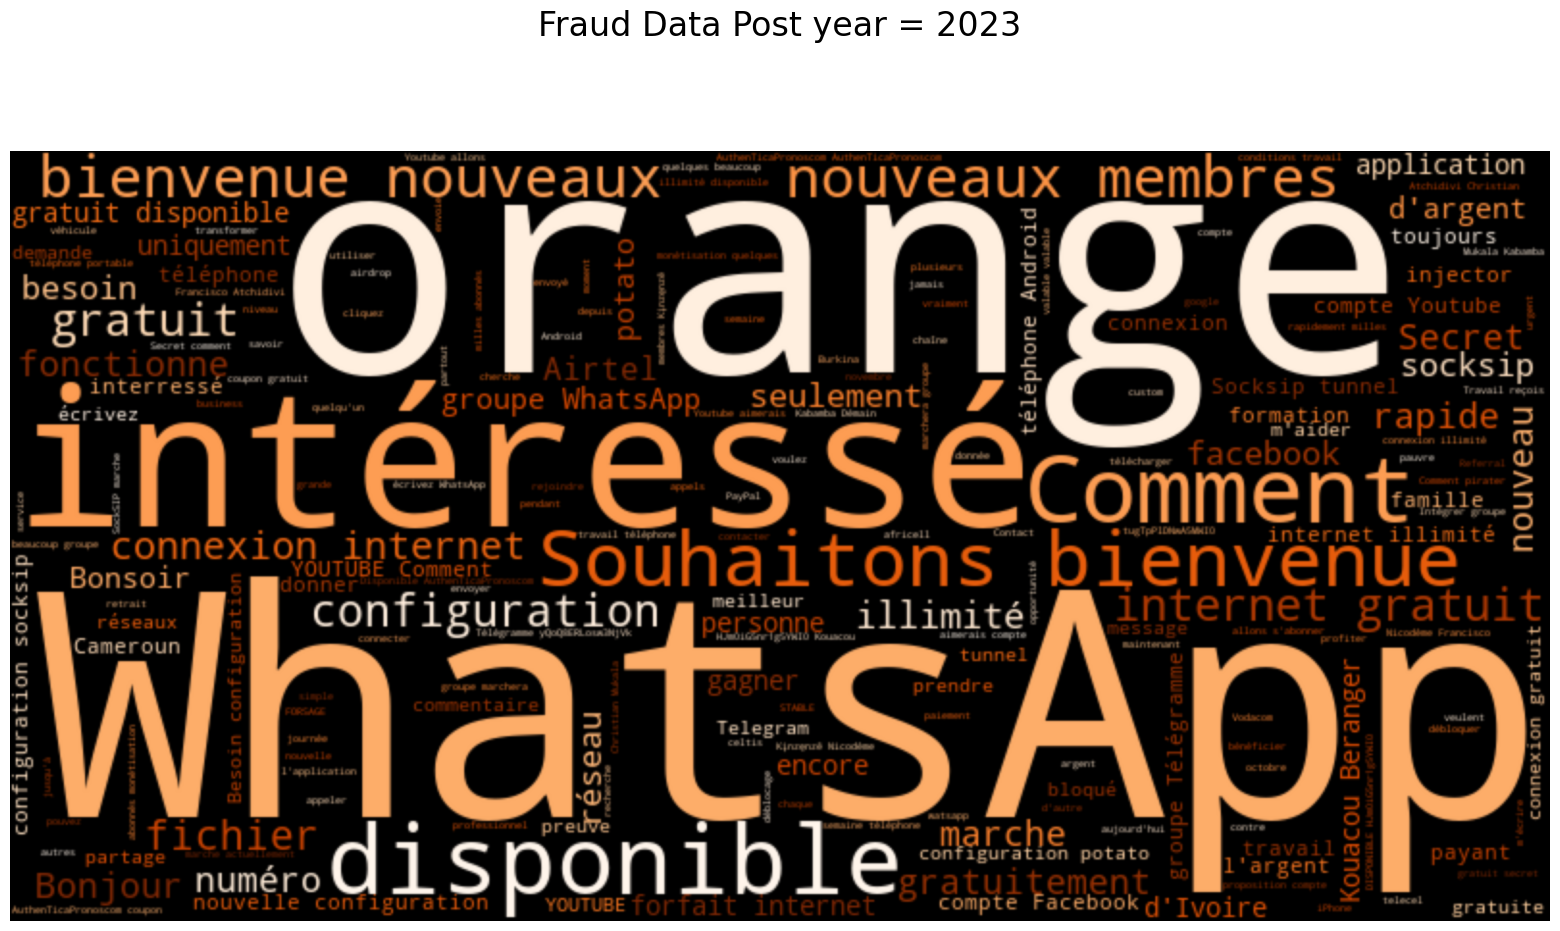

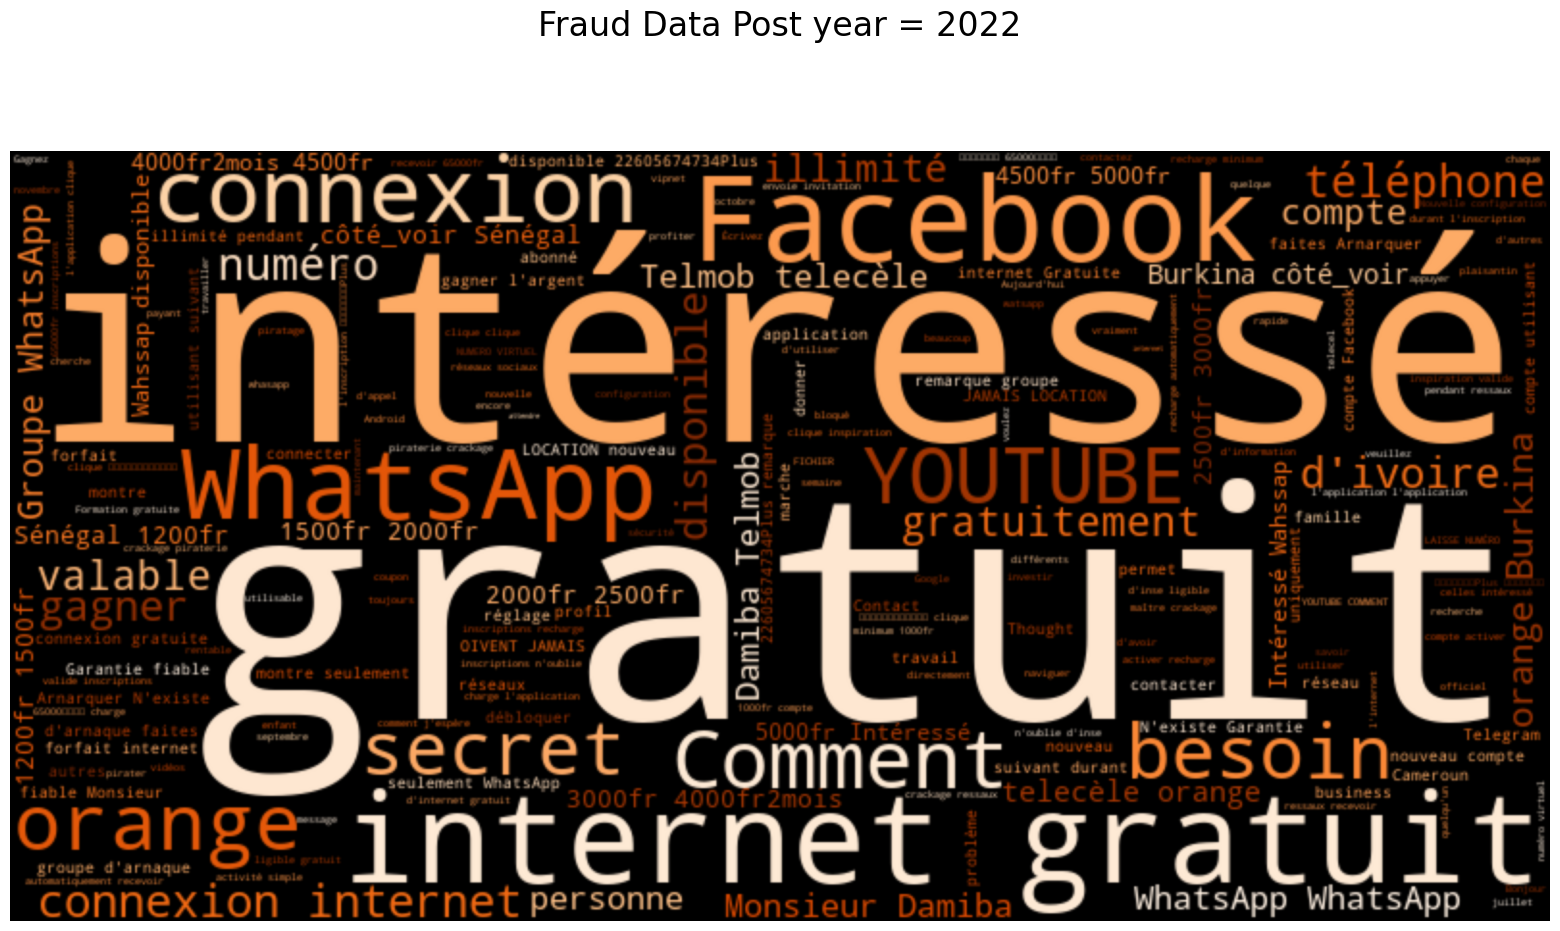

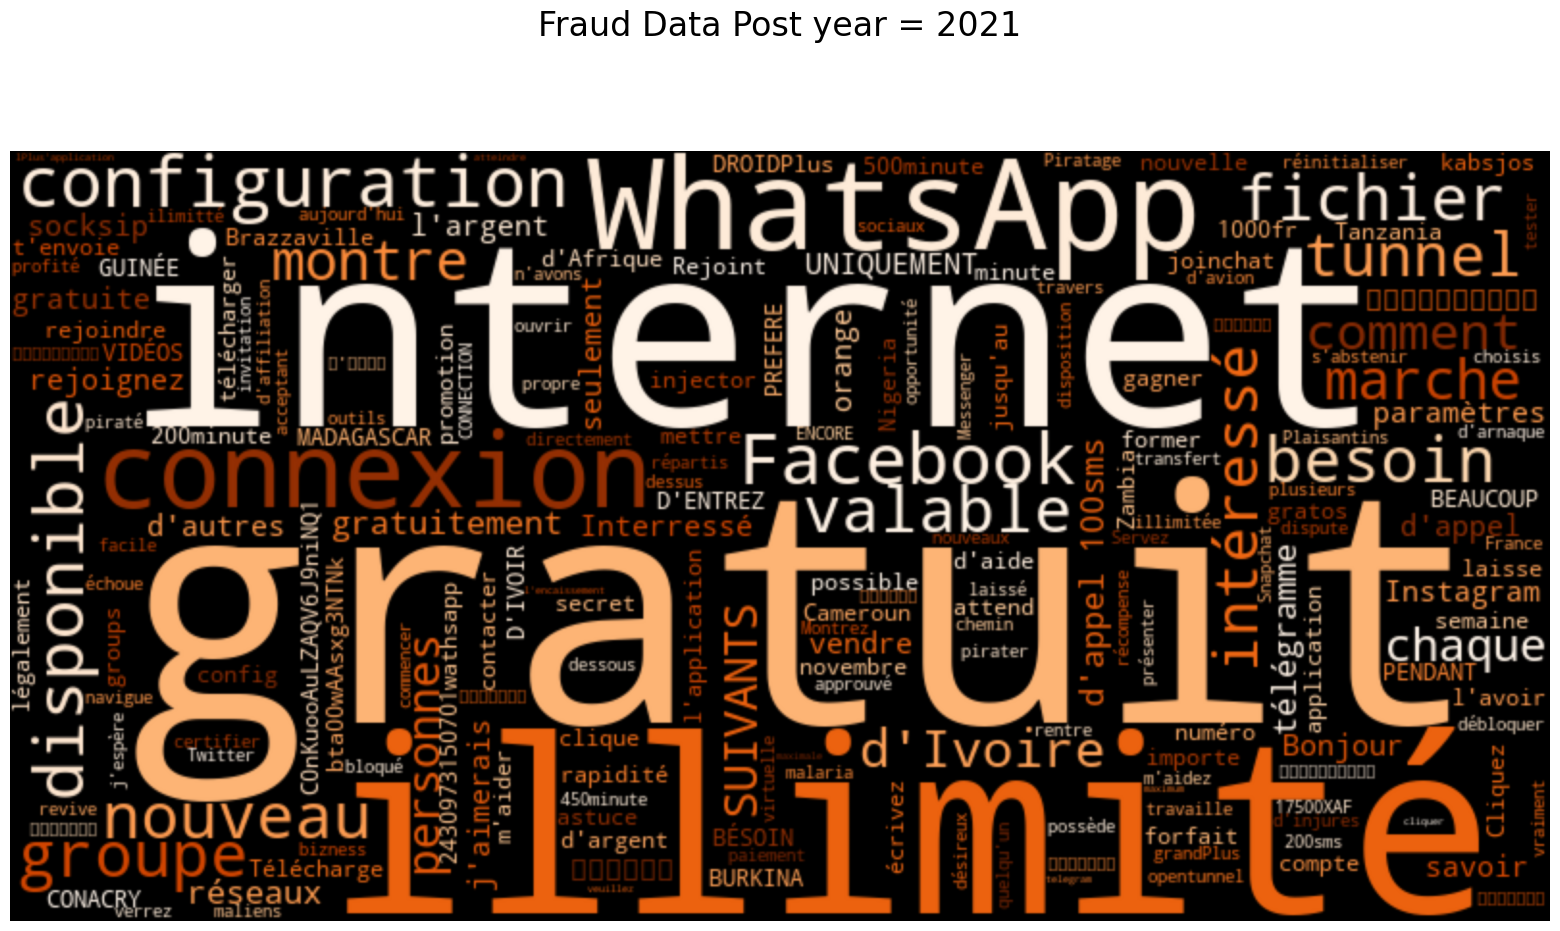

In [443]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
data['text'].fillna(".", inplace =True)
for i in data.year.unique().tolist() :
    text = data[data.year == i].text.tolist()
    text_ =' '.join(text)
    wordcloud = WordCloud(width=800, height=400,background_color='black',min_word_length = 6, colormap = 'Oranges').generate(text_)
    # Afficher le nuage de mots
    plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud, interpolation='gaussian')
    plt.text(0.5, 1.15, f"Fraud Data Post year = {i}", size=24, ha='center', transform=plt.gca().transAxes)
    plt.axis("off")
    plt.show()

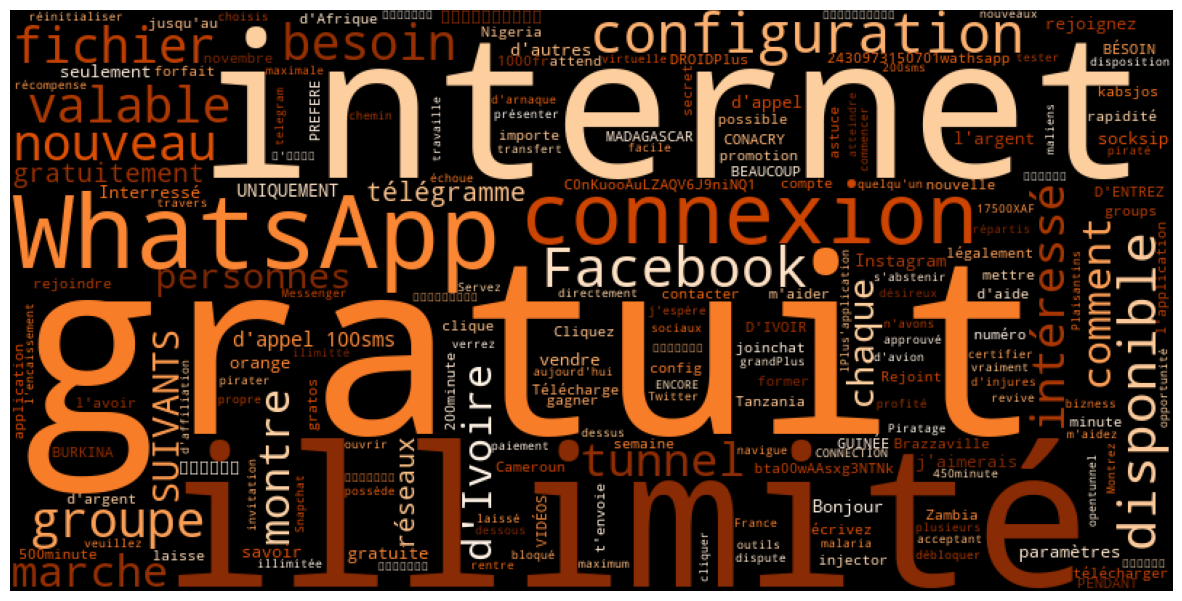

In [480]:
from wordcloud import ImageColorGenerator

#Create the mask
colosseum_mask = np.array(Image.open("C:/Users/diagne080894/Pictures/mali_map.png"))

#Grab the mask colors
colors = ImageColorGenerator(colosseum_mask)

#Instantiate the wordcloud using color_func argument
cloud = WordCloud(width=800, height=400,background_color='black',min_word_length = 6, colormap = 'Oranges').generate(text_)

#Plot the wordcloud
plt.figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis('off')
#plt.title(title)
plt.show()

In [452]:
data.year.unique()
data.sample()
data.sample()

Unnamed: 0.1  Unnamed: 0           post_id   
2127          2127        2127  1086937958659180  \

                                                text   
2127  Bonjour les amis je veux le code de 1go à 150f  \

                                           post_text shared_text   
2127  bonjour les amis je veux le code de 1go à 150f         NaN  \

      original_text                 time     timestamp image image_lowquality   
2127            NaN  2022-10-16 11:22:59  1.665919e+09   NaN              NaN  \

     images images_description images_lowquality   
2127     []                 []                []  \

     images_lowquality_description video  video_duration_seconds   
2127                            []   NaN                     NaN  \

      video_height  video_id  video_quality  video_size_MB video_thumbnail   
2127           NaN       NaN            NaN            NaN             NaN  \

      video_watches  video_width  likes  comments  shares   
2127            NaN          NaN     27        13       0  \

                                               post_url link   
2127  https://m.facebook.com/groups/1040893559930287...  NaN  \

                                                  links          user_id   
2127  [{'link': 'https://m.facebook.com/groups/10408...  100085813581282  \

           username user_url  is_live  factcheck  shared_post_id shared_time   
2127  Demssi Môgôba      NaN    False        NaN             NaN         NaN  \

      shared_user_id shared_username shared_post_url  available   
2127             NaN             NaN             NaN       True  \

      comments_full  reactors  w3_fb_url  reactions  reaction_count   
2127            NaN       NaN        NaN        NaN              27  \

                                                   with  page_id  sharers   
2127  [{'name': 'Connexion internet gratuit', 'link'...      NaN      NaN  \

      image_id image_ids  was_live                                    header   
2127       NaN        []     False  Demssi Môgôba‎Connexion internet gratuit  \

     video_ids videos listing_title  listing_price listing_location   
2127       NaN    NaN           NaN            NaN              NaN  \

            date  year_mm  year    source  
2127  2022-10-16  2022-10  2022  Facebook

In [445]:
import requests
from bs4 import BeautifulSoup
import collections
import re
word = str(text)
# Parse the HTML content of the search results page
soup = BeautifulSoup(word, 'html.parser')
text = soup.get_text()
words = re.findall(r'\w+', text.lower())  # Tokenize and convert to lowercase
word_counts = collections.Counter(words)

for word, count in word_counts.most_common(100):
    print(f'{word}: {count}')

n: 71
et: 43
de: 40
vpn: 36
gratuit: 34
d: 33
le: 26
je: 25
les: 23
est: 23
pour: 21
illimité: 20
whatsapp: 20
internet: 20
code: 20
vous: 18
sur: 18
en: 16
j: 15
que: 15
ndroid: 14
un: 14
tu: 14
salut: 13
connexion: 13
c: 13
la: 12
si: 12
mtn: 12
on: 12
com: 11
à: 11
ai: 10
pays: 10
mon: 10
qui: 9
a: 9
configuration: 8
besoin: 8
groupe: 8
facebook: 8
disponible: 8
tout: 8
t: 8
valable: 8
au: 8
nouveau: 8
dans: 8
svp: 8
l: 8
moi: 8
avec: 8
ha: 8
giga: 8
fichier: 7
ou: 7
mois: 7
pv: 7
tunnel: 7
veux: 7
20: 6
comme: 6
marche: 6
ce: 6
me: 6
peux: 6
avoir: 6
pas: 6
montre: 6
appel: 6
juste: 6
ça: 6
jour: 5
bénin: 5
ivoire: 5
10: 5
comment: 5
intéressé: 5
des: 5
argent: 5
matin: 5
nous: 4
personnes: 4
droid: 4
ntout: 4
aux: 4
suivants: 4
côte: 4
sont: 4
nnb: 4
tous: 4
chaque: 4
gratuitement: 4
du: 4
nje: 4
même: 4
te: 4
info: 4
100sms: 4
3000f: 4


In [447]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'post_id', 'text', 'post_text',
       'shared_text', 'original_text', 'time', 'timestamp', 'image',
       'image_lowquality', 'images', 'images_description', 'images_lowquality',
       'images_lowquality_description', 'video', 'video_duration_seconds',
       'video_height', 'video_id', 'video_quality', 'video_size_MB',
       'video_thumbnail', 'video_watches', 'video_width', 'likes', 'comments',
       'shares', 'post_url', 'link', 'links', 'user_id', 'username',
       'user_url', 'is_live', 'factcheck', 'shared_post_id', 'shared_time',
       'shared_user_id', 'shared_username', 'shared_post_url', 'available',
       'comments_full', 'reactors', 'w3_fb_url', 'reactions', 'reaction_count',
       'with', 'page_id', 'sharers', 'image_id', 'image_ids', 'was_live',
       'header', 'video_ids', 'videos', 'listing_title', 'listing_price',
       'listing_location', 'date', 'year_mm', 'year', 'source'],
      dtype='object')

In [451]:
data.shape

(2329, 62)

In [433]:
word = []
for i in text : 
    word_ = str(i)
    word.append(word_)
    

In [345]:
from concurrent.futures import ThreadPoolExecutor
from facebook_scraper import get_group_info, get_posts
def fetch_posts_for_group(group_id):
    posts = []
    group = get_group_info(group_id)  # or get_group_info("makeupartistsgroup", cookies="cookies.txt")
    return group
df = []
with ThreadPoolExecutor(max_workers=5) as executor:
    futures = [executor.submit(fetch_posts_for_group, group_id) for group_id in group_ids]
    for future in futures:
        df.extend(future.result())

In [347]:
df

[]

In [331]:
data = pd.DataFrame(data)
data.sample(2)
#for i in data.post_id.tolist() : 
data.shape

(2329, 60)

In [483]:
data = pd.read_csv('data_post.csv')
data.shape

(2329, 57)

In [484]:
data['post_text'].fillna('', inplace=True)
data['post_text']= data['post_text'].str.lower()
pattern = 'orange|mtn|malitel|ip|config|teleg|forfait|data|gratuit|vpn|orange_|arnaque|forfait_free|fichier_source_internet|anonytune_mali|yourFreedom|Free|internet_free|orangemali|host_orangemali|pasdeforfaitinternetorange|pasdeforfait|apn|tunnel|bloqu'
#pattern = 'vpn|gratuit'
data['post_type'] = np.where(data['post_text'].str.contains(pattern), 'fraud_post', 'not_fraud_post')

df.shape, data.shape

((703, 62), (2329, 58))

In [ ]:
data.

In [486]:
data.post_type.value_counts()
data.to_csv('goups_post.csv')

In [454]:
tt=data[data['post_text'].str.contains('https://t.me')]
tt.text.iloc[7]
df['year_mm'].value_counts()
import numpy as np

In [309]:
tt.text.iloc[4]
#df.sample(3)

'LES FICHIER PREMIUM SONT DISPONIBLES ICI AVEC LES VPN TRÈS STABLE VIENS TESTÉ👇👇👇👇👇\nhttps://t.me/+HJm0iG5nr1g5YWI0\n\nKouacou Beranger\n1 octobre, 19:31 ·\n\nLES FICHIER PREMIUM SONT DISPONIBLES ICI AVEC LES VPN TRÈS STABLE VIENS TESTÉ👇👇👇👇👇\nhttps://t.me/+HJm0iG5nr1g5YWI0'

In [333]:
data['date'] = pd.to_datetime(data.time).dt.strftime('%Y-%m-%d')
data['year_mm'] = data.date.str.slice(0,7)
data['year'] = data.date.str.slice(0,4)
data.sample()

Unnamed: 0           post_id   
729         729  1037858054002710  \

                                                  text   
729  Tu es à 🤷 quel niveau de ta relation amoureuse...  \

                                             post_text shared_text   
729  Tu es à 🤷 quel niveau de ta relation amoureuse...         NaN  \

     original_text                 time     timestamp image image_lowquality   
729            NaN  2023-11-02 11:25:27  1.698924e+09   NaN              NaN  \

    images images_description images_lowquality images_lowquality_description   
729     []                 []                []                            []  \

    video  video_duration_seconds  video_height  video_id  video_quality   
729   NaN                     NaN           NaN       NaN            NaN  \

     video_size_MB video_thumbnail  video_watches  video_width  likes   
729            NaN             NaN            NaN          NaN     29  \

     comments  shares                                           post_url link   
729        38       0  https://m.facebook.com/groups/827209621734222/...  NaN  \

                                                 links          user_id   
729  [{'link': 'https://m.facebook.com/groups/82720...  100082054425408  \

             username user_url  is_live  factcheck  shared_post_id   
729  Moïse Elysée Djè      NaN    False        NaN             NaN  \

    shared_time  shared_user_id shared_username shared_post_url  available   
729         NaN             NaN             NaN             NaN       True  \

     comments_full  reactors  w3_fb_url  reactions  reaction_count   
729            NaN       NaN        NaN        NaN              29  \

                                                  with       page_id  sharers   
729  [{'name': 'Connexion internet gratuit et illim...  1.077746e+14      NaN  \

     image_id image_ids  was_live   
729       NaN        []     False  \

                                                header video_ids videos   
729  Moïse Elysée Djè‎Connexion internet gratuit et...       NaN    NaN  \

    listing_title  listing_price listing_location        date  year_mm  year  
729           NaN            NaN              NaN  2023-11-02  2023-11  2023

In [314]:
data.likes.sum()
data.comments.sum()

43522

In [167]:
df.sort_values('date').head()
df['yyyy_mm'] = df.date.str.slice(start=0, stop=7)
df_= pd.DataFrame(df['yyyy_mm'].value_counts())
df_.sort_values('yyyy_mm')

C:\Users\diagne080894\AppData\Local\Temp\ipykernel_22868\3676397403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yyyy_mm'] = df.date.str.slice(start=0, stop=7)


count
yyyy_mm       
2021-08      2
2021-10      2
2021-11      1
2022-01      1
2022-02      1
2022-03      2
2022-05      3
2022-07      2
2022-08      8
2023-01      2
2023-02      3
2023-03      4
2023-04      1
2023-07      7
2023-08      4
2023-09     11
2023-10    121
2023-11     10

In [168]:
pd.set_option('display.max_columns', None)
df.head()

post_id                                               text   
2   24037387889208908  1⃣Toi qui a besoin d'un vpn(application qui fo...  \
8   23990598137221217  Les meilleurs Bot de prédictions actuellement ...   
12  23970654802548884  🤩🤩🤩🤩🤩🤩😋😋😋😋😋😋\n\nUrgent 📣🔉😋📣📣📣📣📣\n\nVous avez r...   
13  23942035195410845  *Les fichiers disponible*\n\nMoov Bénin\nMTN B...   
14  23931793939768304  Prédiction lucky jet ❤️😋 avec le meilleur Bot ...   

                                            post_text   
2   1⃣Toi qui a besoin d'un vpn(application qui fo...  \
8   Les meilleurs Bot de prédictions actuellement ...   
12  🤩🤩🤩🤩🤩🤩😋😋😋😋😋😋\n\nUrgent 📣🔉😋📣📣📣📣📣\n\nVous avez r...   
13  *Les fichiers disponible*\n\nMoov Bénin\nMTN B...   
14  Prédiction lucky jet ❤️😋 avec le meilleur Bot ...   

                                          shared_text original_text   
2                                                              None  \
8                                                              None   
12  YOUTUBE.COM\nAZCOINER : URGENT 📣 VENEZ PROFITE...          None   
13                                                             None   
14                                                             None   

                  time   timestamp   
2  2023-10-29 13:14:26  1698585266  \
8  2023-10-22 16:41:11  1697992871   
12 2023-10-19 17:10:20  1697735420   
13 2023-10-15 08:18:44  1697357924   
14 2023-10-13 19:28:20  1697225300   

                                                image   
2                                                None  \
8   https://m.facebook.com/photo/view_full_size/?f...   
12                                               None   
13                                               None   
14  https://m.facebook.com/photo/view_full_size/?f...   

                                     image_lowquality   
2                                                None  \
8   https://scontent.fbko4-2.fna.fbcdn.net/v/t39.3...   
12  https://external.fbko4-2.fna.fbcdn.net/emg1/v/...   
13                                               None   
14  https://scontent.fbko4-2.fna.fbcdn.net/v/t39.3...   

                                               images   
2                                                  []  \
8   [https://m.facebook.com/photo/view_full_size/?...   
12                                                 []   
13                                                 []   
14  [https://m.facebook.com/photo/view_full_size/?...   

                                   images_description   
2                                                  []  \
8   [Peut être une image de texte qui dit ’время: ...   
12                                                 []   
13                                                 []   
14  [Peut être une image de ‎téléphone et ‎texte q...   

                                    images_lowquality   
2                                                  []  \
8   [https://scontent.fbko4-2.fna.fbcdn.net/v/t39....   
12  [https://external.fbko4-2.fna.fbcdn.net/emg1/v...   
13                                                 []   
14  [https://scontent.fbko4-2.fna.fbcdn.net/v/t39....   

                        images_lowquality_description video   
2                                                  []  None  \
8   [Peut être une image de texte qui dit ’время: ...  None   
12                                             [None]  None   
13                                                 []  None   
14  [Peut être une image de ‎téléphone et ‎texte q...  None   

   video_duration_seconds video_height video_id video_quality video_size_MB   
2                    None         None     None          None          None  \
8                    None         None     None          None          None   
12                   None         None     None          None          None   
13                   None         None     None          None          None   
14                   None         None     None          None        

In [213]:
df.comments.sum()
df.likes.sum()
data.iloc[:,:10].to_csv('groups_post.csv',sep='\t', index=False, encoding='utf-16')
col = data.columns

In [216]:
df.columns

Index(['post_id', 'text', 'post_text', 'shared_text', 'original_text', 'time',
       'timestamp', 'image', 'image_lowquality', 'images',
       'images_description', 'images_lowquality',
       'images_lowquality_description', 'video', 'video_duration_seconds',
       'video_height', 'video_id', 'video_quality', 'video_size_MB',
       'video_thumbnail', 'video_watches', 'video_width', 'likes', 'comments',
       'shares', 'post_url', 'link', 'links', 'user_id', 'username',
       'user_url', 'is_live', 'factcheck', 'shared_post_id', 'shared_time',
       'shared_user_id', 'shared_username', 'shared_post_url', 'available',
       'comments_full', 'reactors', 'w3_fb_url', 'reactions', 'reaction_count',
       'with', 'page_id', 'sharers', 'image_id', 'image_ids', 'was_live',
       'header', 'video_ids', 'videos', 'listing_title', 'listing_price',
       'listing_location', 'date', 'yyyy_mm'],
      dtype='object')

In [202]:
data[data.index==35]

post_id                                               text   
35  10021118477929085  Souscription internet 2mois illimité dont 62jo...  \

                                            post_text shared_text   
35  Souscription internet 2mois illimité dont 62jo...              \

   original_text                time   timestamp image image_lowquality   
35          None 2023-09-22 13:38:59  1695389939  None             None  \

   images images_description images_lowquality images_lowquality_description   
35     []                 []                []                            []  \

   video video_duration_seconds video_height video_id video_quality   
35  None                   None         None     None          None  \

   video_size_MB video_thumbnail video_watches video_width  likes  comments   
35          None            None          None        None      5         0  \

    shares                                           post_url  link   
35       0  https://m.facebook.com/groups/1276455579062129...  None  \

                                                links          user_id   
35  [{'link': 'https://m.facebook.com/groups/12764...  100089777377293  \

      username user_url  is_live factcheck shared_post_id shared_time   
35  Serge Yaké     None    False      None           None         NaT  \

   shared_user_id shared_username shared_post_url  available comments_full   
35           None            None            None       True          None  \

   reactors w3_fb_url reactions  reaction_count   
35     None      None      None               5  \

                                                 with page_id sharers   
35  [{'name': 'vpn connexion gratuit Android', 'li...    None    None  \

   image_id image_ids  was_live                                    header   
35     None        []     False  Serge Yaké‎vpn connexion gratuit Android  \

   video_ids videos listing_title listing_price listing_location        date  
35       NaN    NaN           NaN           NaN              NaN  2023-09-22

In [182]:
import pandas as pd
import csv
from textblob import TextBlob
#from textblob.sentiments import NaiveBayesAnalyzers
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import nltk
import textmining
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
# set the working dierectory
import os
#os.chdir("../input")

ModuleNotFoundError: No module named 'textblob'

In [18]:
import plotly.express as px
import pandas as pd

# Sample data
data = {
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'],
    'Population': [8550405, 3971883, 2720546, 2296224, 1680992]
}

df = pd.DataFrame(data)

# Creating a bar chart with Plotly Express
fig = px.bar(df, x='City', y='Population')

# Adjusting the display etiquette
fig.update_layout(
    title='Population of Major US Cities',
    xaxis_title='City',
    yaxis_title='Population',
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent plot background
    paper_bgcolor='rgb(255,255,255)',  # White background
    font=dict(family='Arial', size=12, color='black'),  # Font style
    margin=dict(l=50, r=50, t=50, b=50),  # Setting margins
    xaxis=dict(tickangle=45),  # Rotating x-axis labels
    yaxis=dict(tickformat=',d')  # Adding comma to y-axis labels for thousands separator
)

fig.update_traces(marker_color='skyblue')  # Setting bar color

# Show the chart
fig.show()
